# Finding planets

## With Lightkurve
"A friendly Python package for making discoveries with Kepler & TESS."

Source: [lightkurve tutorials](https://docs.lightkurve.org/tutorials/index.html)


# Import

In [2]:
# Import librairies
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Search for Target Pixel Files

In [3]:
search_result = lk.search_targetpixelfile("kplr006497146").download()
search_result

SearchResult containing 17 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 01 2009 Kepler    1800 kplr006497146      0.0
  1 Kepler Quarter 02 2009 Kepler    1800 kplr006497146      0.0
  2 Kepler Quarter 03 2009 Kepler    1800 kplr006497146      0.0
  3 Kepler Quarter 04 2010 Kepler    1800 kplr006497146      0.0
  4 Kepler Quarter 05 2010 Kepler    1800 kplr006497146      0.0
  5 Kepler Quarter 06 2010 Kepler    1800 kplr006497146      0.0
  6 Kepler Quarter 07 2010 Kepler    1800 kplr006497146      0.0
  7 Kepler Quarter 08 2011 Kepler    1800 kplr006497146      0.0
  8 Kepler Quarter 09 2011 Kepler    1800 kplr006497146      0.0
  9 Kepler Quarter 10 2011 Kepler    1800 kplr006497146      0.0
 10 Kepler Quarter 11 2012 Kepler    1800 kplr006497146      0.0
 11 Kepler Quarter 12 2012 Kepler    1800 kplr006497146      0.0
 12 Kepler Quarter 13 2012 Kepler    1800 kplr006497146      0.0
 13 Kepler Quarter 14 2012 Kepler    1800 kplr006497146      0.0
 14 Kepler Quarter 15 2013 Kepler    1800 kplr006497146      0.0
 15 Kepler Quarter 16 2013 Kepler    1800 kplr006497146      0.0
 16 Kepler Quarter 17 2013 Kepler    1800 kplr006497146      0.0

# 2. Download Target Pixel Files

In [5]:
tpf = search_result[0].download()
tpf

KeplerTargetPixelFile Object (ID: 6497146)

In [31]:
tpf_local = lk.read("/Users/derrickvanfrausum/BeCode_AI/git-repos/astrodd/data/tess2020020091053-s0021-0000000356683181-0167-s_tp.fits")
tpf_local

TessTargetPixelFile(TICID: 356683181)

In [32]:
tpf_local.get_header()

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    3 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2020-03-27'         / file creation date.                            
TSTART  =    1870.436476258348 / observation start time in BTJD                 
TSTOP   =    1897.783435341640 / observation stop time in BTJD                  
DATE-OBS= '2020-01-21T22:27:

<AxesSubplot:title={'center':'Target ID: 356683181, Cadence: 462946'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

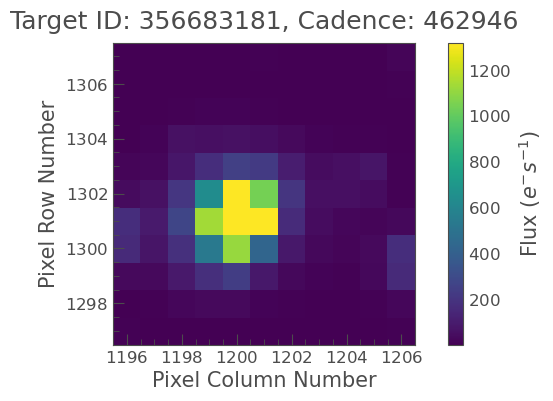

In [33]:
tpf_local.plot(frame=1)

In [34]:
tpf_local.animate()

In [6]:
tpf.animate()

<AxesSubplot:title={'center':'Target ID: 6497146, Cadence: 1105'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

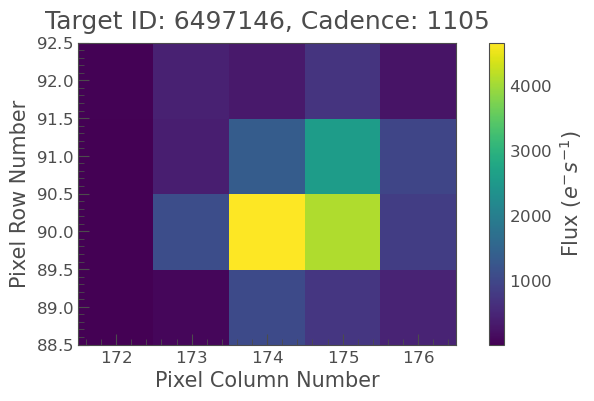

In [7]:
tpf.plot(frame=0)

<AxesSubplot:title={'center':'Target ID: 6497146, Cadence: 1105'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

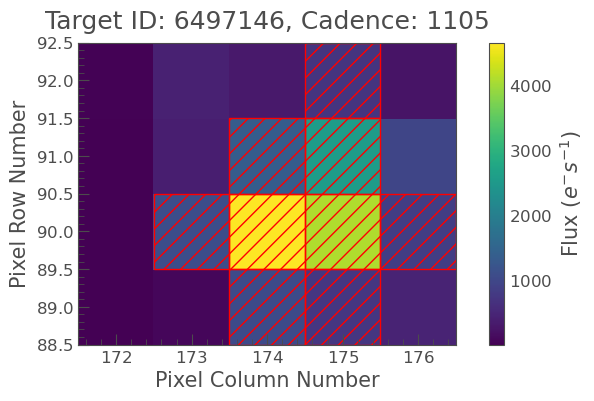

In [9]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

<AxesSubplot:title={'center':'Target ID: 356683181, Cadence: 462945'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

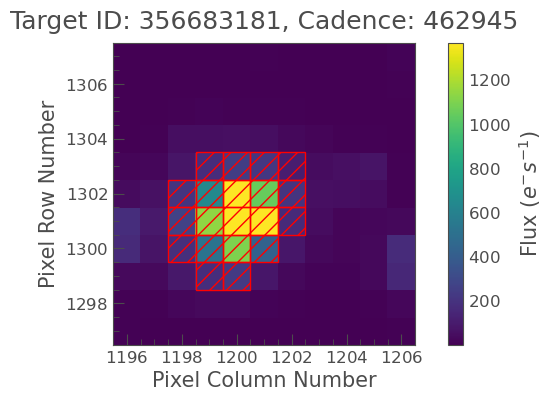

In [35]:
tpf_local.plot(aperture_mask=tpf_local.pipeline_mask)

# 3. Convert to a light curve

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

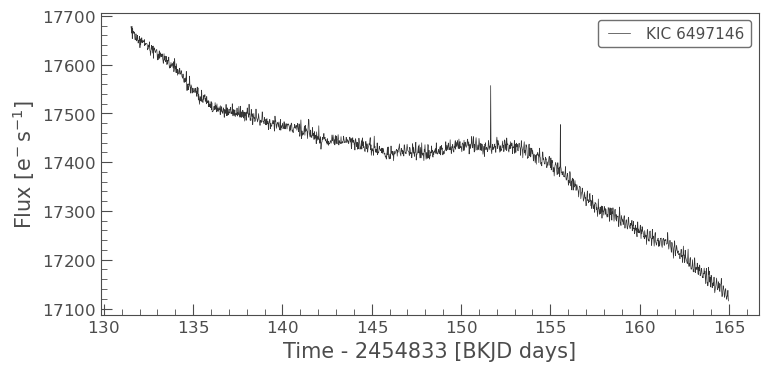

In [10]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

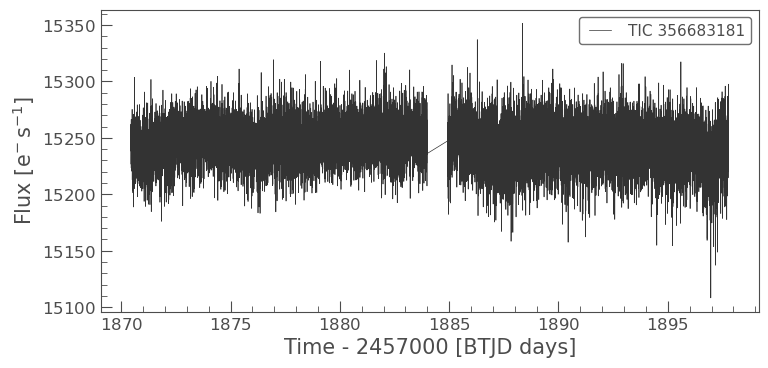

In [37]:
lc_local = tpf_local.to_lightcurve(aperture_mask=tpf_local.pipeline_mask)
lc_local.plot()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

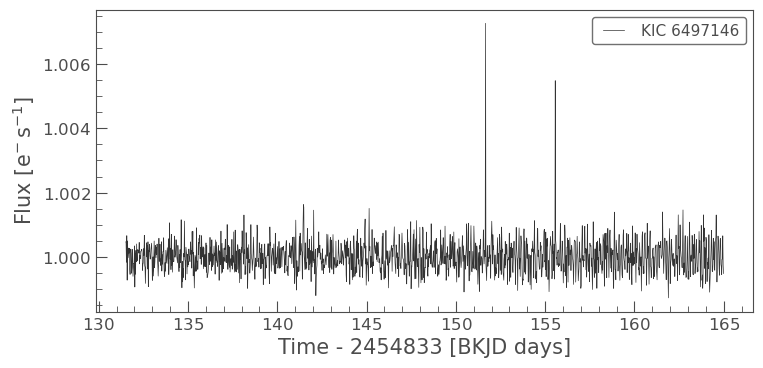

In [38]:
flat_lc = lc.flatten()
flat_lc.plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

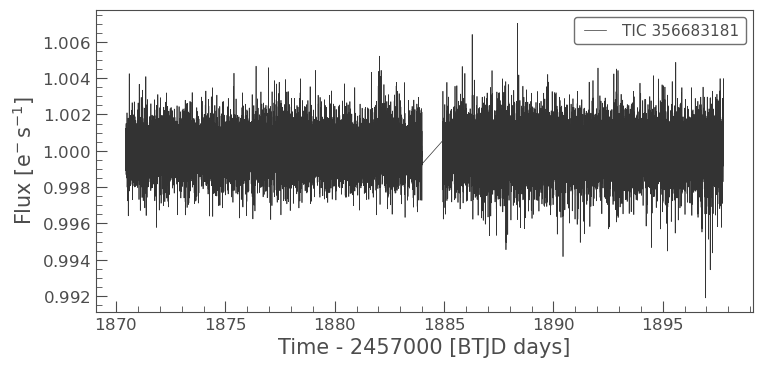

In [39]:
flat_lc_local = lc_local.flatten()
flat_lc_local.plot()

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

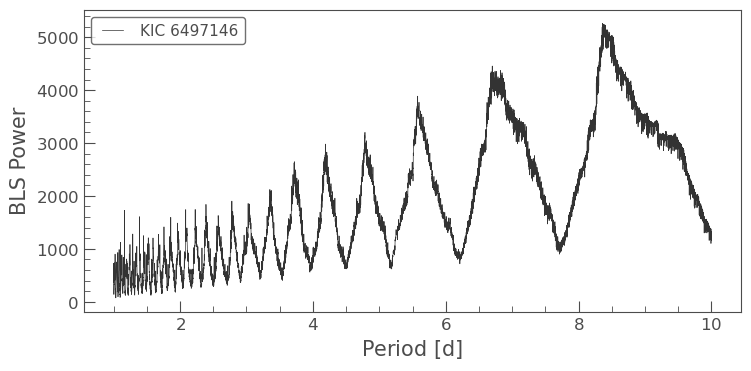

In [40]:
import numpy as np
periodogram = lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

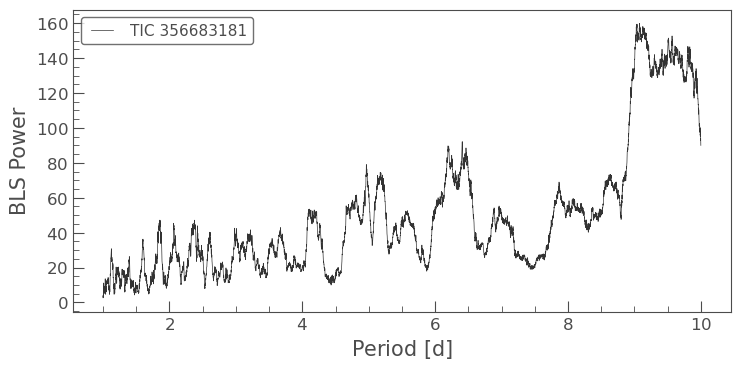

In [41]:
periodogram_local = lc_local.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram_local.plot()

In [42]:
best_fit_period = periodogram.period_at_max_power
print(f"Best fit period: {best_fit_period: .5f}")

Best fit period:  8.35900 d


In [47]:
best_fit_period_local = periodogram_local.period_at_max_power
print(f"Best fit period: {best_fit_period_local: .5f}")

Best fit period:  9.07700 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

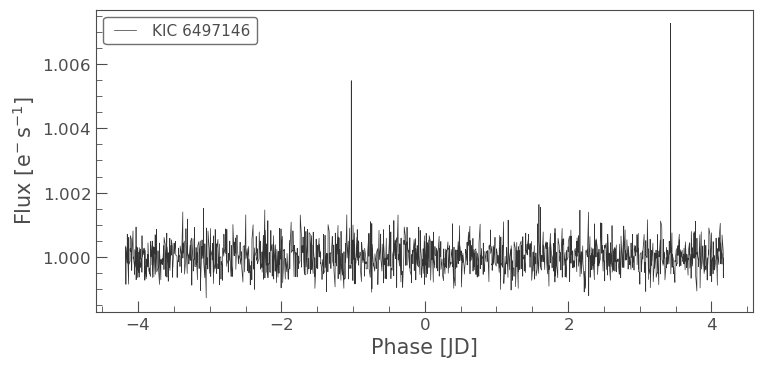

In [44]:
folded_lc = flat_lc.fold(period=best_fit_period)
folded_lc.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

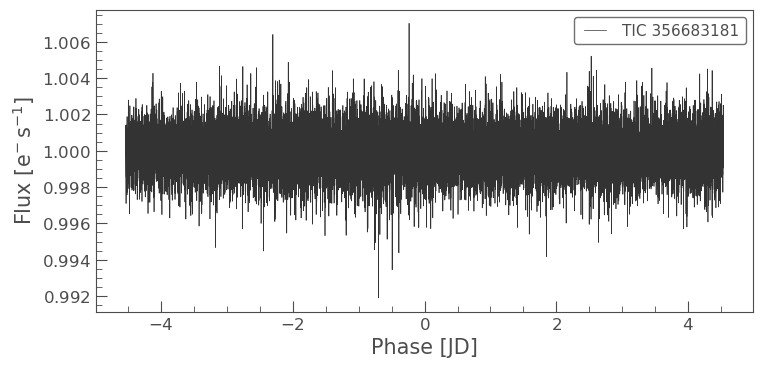

In [48]:
folded_lc_local = flat_lc_local.fold(period=best_fit_period_local)
folded_lc_local.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

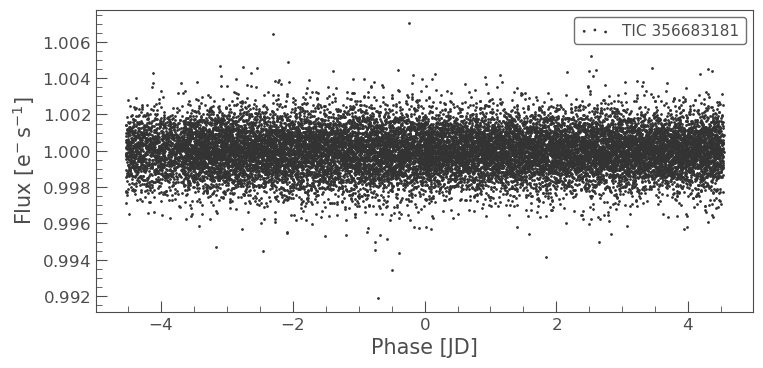

In [49]:
folded_lc_local.scatter()

In [50]:
folded_lc_local

<FoldedLightCurve length=18758 LABEL="TIC 356683181" SECTOR=21>
        time               flux        ... cadenceno quality
                       electron / s    ...                  
       object            float64       ...   int32    int32 
------------------- ------------------ ... --------- -------
 -4.538117833741413 1.0006139554030382 ...    479284       0
 -4.538109740077766 0.9997404207041932 ...    466213       0
-4.5367289685057735 1.0007958917120758 ...    479285       0
 -4.536720853645669 1.0013948996882676 ...    466214       0
-4.5353401032692275 1.0005081591259612 ...    479286       0
 -4.535331966979605  1.000151208554062 ...    466215       0
 -4.533951238032904 0.9977407635060767 ...    479287       0
 -4.533943080547282 0.9995642564510892 ...    466216       0
 -4.532562372797264 0.9970949283350508 ...    479288       0
                ...                ... ...       ...     ...
  4.531937839843481 1.0006052542994042 ...    479279       0
  4.531945827062372 0.9997280481156283 ...    466208       0
  4.533326705079121 1.0025083483983974 ...    479280       0
  4.533334713727982 1.0003729520780598 ...    466209       0
 4.5347155703149875 1.0015876767168261 ...    479281       0
  4.534723600159396 1.0012402759388197 ...    466210       0
  4.536104435784142 0.9991302518501772 ...    479282       0
  4.536112486824096 0.9996753491293797 ...    466211       0
  4.537493301021145 0.9999318832955156 ...    479283       0
  4.537501373256419 1.0008943788815658 ...    466212       0

In [52]:
folded_lc_local.flux

<Quantity [1.00061396, 0.99974042, 1.00079589, ..., 0.99967535, 0.99993188,
           1.00089438] electron / s>

In [53]:
folded_lc_local.time

<TimeDelta object: scale='None' format='jd' value=[-4.53811783 -4.53810974 -4.53672897 ...  4.53611249  4.5374933
  4.53750137]>